# EEE4114F Digitial Signals Processing Machine Learning Project

## SCISSOR Hand-Recognition Machine Learning

(120, 120)


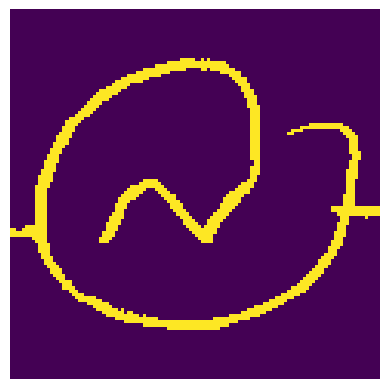

In [1]:
#importing required libraries
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt

# reading the image
img = imread('acsrchd.png')
plt.axis("off")
plt.imshow(img)
print(img.shape)

(512, 256)


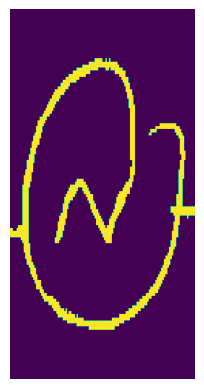

In [2]:
# resizing image
resized_img = resize(img, (128*4, 64*4))
plt.axis("off")
plt.imshow(resized_img)
print(resized_img.shape)

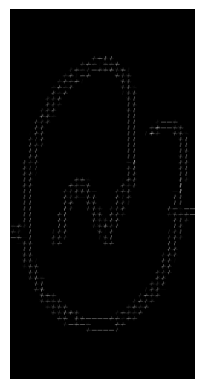

In [3]:
#creating hog features
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True)
plt.axis("off")
plt.imshow(hog_image, cmap="gray")

In [4]:
import cv2
import numpy as np
import os

def extract_features(image_path):
#     # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
#     # Resize the image to a standard size (120x120)
    resized_image = cv2.resize(image, (120, 120))
    
#     # Perform feature extraction (you can use any method here)
#     # For example, you can calculate the histogram of pixel intensities
    hist = cv2.calcHist([resized_image], [0], None, [256], [0, 256])
    
#     # Flatten the histogram to a 1D array
    flattened_hist = hist.flatten()
    
#     # Optionally, you can normalize the feature vector
    normalized_features = flattened_hist / np.sum(flattened_hist)
    
    return normalized_features

# # Define the path to your dataset of BMP images
dataset_path = "solvasubset/"

# # Initialize an empty list to store the extracted features
features_list = []

# # Loop through each image in the dataset
for image_name in os.listdir(dataset_path):
#     # Construct the full path to the image
    image_path = os.path.join(dataset_path, image_name)
    
#     # Extract features from the image
    features = extract_features(image_path)
    
#     # Append the features to the features_list
    features_list.append(features)

# # Convert the features_list to a NumPy array
features_array = np.array(features_list)

# # Now you can use features_array for classification
# # For example, you can train a machine learning model using features_array as input


In [5]:
# from sklearn.model_selection import train_test_split
# from sklearn.svm import SVC
# from sklearn.preprocessing import LabelEncoder

# # # Assuming you have already loaded your features_array and labels

# # # Step 2: Create a list of labels corresponding to each image
# # # Example:
# labels = ["acsource", "ammeter", "capacitor", "cell", "diode", "ground", "inductor", "resistor", "voltmeter"]

# # # Step 3: Encode the labels using LabelEncoder
# label_encoder = LabelEncoder()
# label_encoded = label_encoder.fit_transform(labels)

# num_samples_features = features_array.shape[0]

# # # Check the length of the encoded labels array
# num_samples_labels = len(label_encoded)

# # # Ensure the number of samples in the features array matches the number of labels
# if num_samples_features != num_samples_labels:
#      # Adjust either the features array or the encoded labels array
# #     # For example, you can remove excess samples from the features array or add missing labels to the encoded labels array
# #     # Here's a hypothetical example:
#      if num_samples_features > num_samples_labels:
#          features_array = features_array[:num_samples_labels]
#      else:
#          label_encoded = label_encoded[:num_samples_features]
        
# # # Step 4: Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(features_array, label_encoded, test_size=0.2, random_state=42)

# # # Initialize the SVM classifier
# svm_classifier = SVC(kernel='linear')

# # # Train the SVM classifier
# svm_classifier.fit(X_train, y_train)

# # # Evaluate the classifier on the testing set
# accuracy = svm_classifier.score(X_test, y_test)
# print("Accuracy:", accuracy)


In [6]:
from skimage.feature import hog
import cv2
import numpy as np
from sklearn.svm import SVC


template_images = []
template_labels = ["acsource", "ammeter", "capacitor", "cell", "diode", "ground", "inductor", "resistor", "voltmeter"]

for label in template_labels:
    img_path = f'component_templates/{label}_template.png'
    img = cv2.imread(img_path)

    # Check if the image is loaded successfully
#     if img is not None:
#         cv2.imshow(label, img)
#         cv2.waitKey(0)  # Wait indefinitely until a key is pressed
#         cv2.destroyAllWindows()  # Close all windows when a key is pressed
#     else:
#         print(f"Failed to load image: {img_path}")

# Step 1: Load the template images

for label in template_labels:
    img = cv2.imread(f'component_templates/{label}_template.png')
    template_images.append(img)

# Step 2: Preprocess the template images (if necessary)

# Step 3: Extract HOG features
hog_features = []
for img in template_images:
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray_img = cv2.resize(gray_img, (64, 128))
    hog_feature = hog(gray_img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), transform_sqrt=True, block_norm="L1")
    hog_features.append(hog_feature)

# Step 4: Create labels
labels = np.arange(len(template_labels))

# Step 5: Combine features and labels
X_train = np.array(hog_features)
y_train = np.array(labels)

# Step 6: Train a classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)


SVC(kernel='linear')

In [9]:
# import os
# import cv2
# from skimage.feature import hog
# import numpy as np
# from sklearn.metrics import confusion_matrix

# template_labels = ["acsource", "ammeter", "capacitor", "cell", "diode", "ground", "inductor", "resistor", "voltmeter"]

# # Step 1: Read the BMP images from the "solvasubset" file
dataset_path = "solvasubset/"
test_images = []
true_labels = []

for filename in os.listdir(dataset_path):
    if filename.endswith(".bmp"):
        image_path = os.path.join(dataset_path, filename)
        img = cv2.imread(image_path)
        if img is not None:
            test_images.append(img)
            # Extract the true label from the filename
            true_label = filename.split("_")[0]  # Assuming the naming convention is "component_i.bmp"
            true_labels.append(true_label)
        else:
            print(f"Failed to read image: {image_path}")

# # Step 2: Preprocess the images if necessary

# # Step 3: Extract HOG features from the images
hog_features_test = []

for img in test_images:
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray_img = cv2.resize(gray_img, (64, 128))  # Resize the image if necessary
    hog_feature = hog(gray_img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), transform_sqrt=True, block_norm="L1")
    hog_features_test.append(hog_feature)

# # Step 4: Optionally preprocess the extracted features

# # Step 5: Use the trained SVM classifier to make predictions on the test set
# # Replace `svm_classifier` with your trained classifier
predicted_labels = svm_classifier.predict(hog_features_test)

# # Construct the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=template_labels)

# # Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# # Evaluate the classifier on the testing set
accuracy = svm_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)


Confusion Matrix:
[[0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]]


NameError: name 'X_test' is not defined

In [ ]:
import os
import cv2
from skimage.feature import hog
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# # Step 1: Read the BMP images from the "solvasubset" file
# dataset_path = "solvasubset/"
# test_images = []
# true_labels = []

# for filename in os.listdir(dataset_path):
#     if filename.endswith(".bmp"):
#         image_path = os.path.join(dataset_path, filename)
#         img = cv2.imread(image_path)
#         if img is not None:
#             test_images.append(img)
#             # Extract the true label from the filename
#             true_label = filename.split("_")[0]  # Assuming the naming convention is "component_i.bmp"
#             true_labels.append(true_label)
#         else:
#             print(f"Failed to read image: {image_path}")

# # Step 2: Preprocess the images if necessary

# # Step 3: Extract HOG features from the images
# hog_features_test = []

# for img in test_images:
#     gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     gray_img = cv2.resize(gray_img, (64, 128))  # Resize the image if necessary
#     hog_feature = hog(gray_img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), transform_sqrt=True, block_norm="L1")
#     hog_features_test.append(hog_feature)

# # Step 4: Optionally preprocess the extracted features

# # Step 5: Use the trained SVM classifier to make predictions on the test set
# # Replace `svm_classifier` with your trained classifier
# predicted_labels = svm_classifier.predict(hog_features_test)
# # print(len(predicted_labels))

# # Encode true and predicted labels
# # Manually define label encoding
# label_mapping = {"acsource": 0, "ammeter": 1, "capacitor": 2, "cell": 3, "diode": 4, "ground": 5, "inductor": 6, "resistor": 7, "voltmeter": 8}

# # Initialize LabelEncoder with the defined mapping
# label_encoder = LabelEncoder()
# label_encoder.fit(list(label_mapping.values()))

# # Encode true labels using the manually defined label encoder
# true_labels_encoded = [label_mapping[label] for label in true_labels]

# # Encode predicted labels using the same encoder, but handle unseen labels gracefully
# predicted_labels_encoded = []
# for label in predicted_labels:
#     if label in label_mapping:
#         predicted_labels_encoded.append(label_mapping[label])
#     else:
#         # Handle unseen labels gracefully
#         predicted_labels_encoded.append(-1)  # Or any other placeholder value

# # Remove instances with unseen labels from true labels
# true_labels_encoded_filtered = [label_mapping[label] for label in true_labels if label in label_mapping]

# # Construct the confusion matrix
# conf_matrix = confusion_matrix(true_labels_encoded_filtered, predicted_labels_encoded)

# # Encode predicted labels using the same encoder
# # predicted_labels_encoded = [label_mapping[label] for label in predicted_labels]

# # label_encoder = LabelEncoder()
# # true_labels_encoded = label_encoder.fit_transform(true_labels)
# # predicted_labels_encoded = label_encoder.fit_transform(predicted_labels)

# # Construct the confusion matrix
# # conf_matrix = confusion_matrix(true_labels_encoded_filtered, predicted_labels_encoded)

# # cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = true_labels)

# # # display matrix
# # cm_display.plot()
# # plt.show()


# # Display the predicted labels along with the true labels
# for filename, true_label, predicted_label in zip(os.listdir(dataset_path), true_labels, predicted_labels):
#     print(f"Image: {filename}, True Label: {true_label}, Predicted Label: {template_labels[predicted_label]}")


# # Plot confusion matrix as heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=template_labels, yticklabels=template_labels)
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.title('Confusion Matrix')
# plt.xticks(rotation=45)
# plt.yticks(rotation=0)
# plt.show()

# # Evaluate the classifier on the testing set
# accuracy = svm_classifier.score(X_test, y_test)
# print("Accuracy:", accuracy)


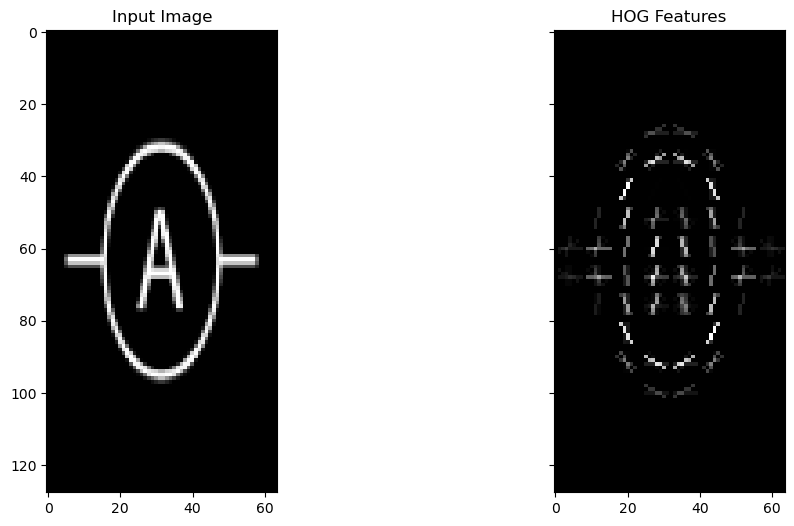

In [46]:
import cv2
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt

# Step 1: Read the "ammeter.bmp" image using OpenCV
image_path = "component_templates/ammeter_template.png"
img = cv2.imread(image_path)

# Step 2: Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_img = cv2.resize(gray_img, (64, 128))
# Step 3: Apply HOG feature extraction using scikit-image
hog_feature, hog_img = hog(gray_img, orientations=9, pixels_per_cell=(8, 8),
                           cells_per_block=(2, 2), transform_sqrt=True,
                           block_norm="L1", visualize=True)

# Step 4: Display the HOG feature visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

ax1.imshow(gray_img, cmap=plt.cm.gray)
ax1.set_title('Input Image')

# Rescale histogram for better visualization
hog_img_rescaled = exposure.rescale_intensity(hog_img, in_range=(0, 10))

ax2.imshow(hog_img_rescaled, cmap=plt.cm.gray)
ax2.set_title('HOG Features')
plt.show()


In [103]:
import os
import cv2
from skimage.feature import hog
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Step 1: Read the BMP images from the component_templates dataset
dataset_path = "component_templates/"
template_images = []
template_labels = []

for filename in os.listdir(dataset_path):
    if filename.endswith(".png"):
        image_path = os.path.join(dataset_path, filename)
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            template_images.append(img)
            # Extract label from the first part of the file name
            label = filename.split('_')[0]
            template_labels.append(label)

# Step 2: Extract HOG features from the images
hog_features = []

for img in template_images:
    img = cv2.resize(img, (64, 128))
    hog_feature = hog(img, orientations=9, pixels_per_cell=(8, 8),
                      cells_per_block=(2, 2), transform_sqrt=True,
                      block_norm="L1")
    hog_features.append(hog_feature)

# Step 3: Convert labels to numeric values
label_mapping = {label: idx for idx, label in enumerate(np.unique(template_labels))}
true_labels_encoded = [label_mapping[label] for label in template_labels]

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(hog_features, true_labels_encoded, test_size=0.2, random_state=42)
# print("X_test shape:", np.array(X_test).shape)
# print("y_test:", y_test)
# Step 5: Train the SVM classifier
svm_classifier = SVC(kernel='sigmoid')
svm_classifier.fit(X_train, y_train)

# Step 6: Evaluate the classifier (optional)
accuracy = svm_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)
print(label_mapping)

Accuracy: 0.0
{'acsource': 0, 'ammeter': 1, 'capacitor': 2, 'cell': 3, 'diode': 4, 'ground': 5, 'inductor': 6, 'resistor': 7, 'template': 8, 'voltmeter': 9}


In [104]:
import os
import cv2
from skimage.feature import hog
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

# Step 1: Read the BMP images from the solvasubset folder
solvasubset_path = "solvasubset/"
test_images = []
true_labels = []

for filename in os.listdir(solvasubset_path):
    if filename.endswith(".bmp"):
        image_path = os.path.join(solvasubset_path, filename)
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            test_images.append(img)
            # Extract label from the first part of the file name
            true_label = filename.split('_')[0]
            true_labels.append(true_label)

# Step 2: Extract HOG features from the test images
hog_features_test = []

for img in test_images:
    img = cv2.resize(img, (64, 128))
    hog_feature = hog(img, orientations=9, pixels_per_cell=(8, 8),
                      cells_per_block=(2, 2), transform_sqrt=True,
                      block_norm="L1")
    hog_features_test.append(hog_feature)

# Step 3: Use the trained SVM classifier to predict labels for the test images
predicted_labels = svm_classifier.predict(hog_features_test)
# print(predicted_labels)
# Step 4: Compare predicted labels with actual component labels
# Step 4: Compare predicted labels with actual component labels
# First, decode the predicted labels using the label_mapping dictionary
label_mapping = {label: idx for idx, label in enumerate(np.unique(predicted_labels))}
predicted_labels_decoded = [label_mapping[label] for label in predicted_labels]

# Next, decode the true labels using the same LabelEncoder used during training
label_encoder = LabelEncoder()
true_labels_encoded = label_encoder.fit_transform(true_labels)
predicted_labels_encoded = label_encoder.fit_transform(predicted_labels_decoded)
# Step 5: Visualize the performance using a decision boundary (Optional)
# Note: Visualization of decision boundary is not straightforward for high-dimensional feature space
# We can use only the first two dimensions for visualization
# If HOG features are of higher dimensionality, consider reducing dimensionality using techniques like PCA
# For demonstration purposes, we'll use only the first two HOG features


<Figure size 1500x1000 with 0 Axes>

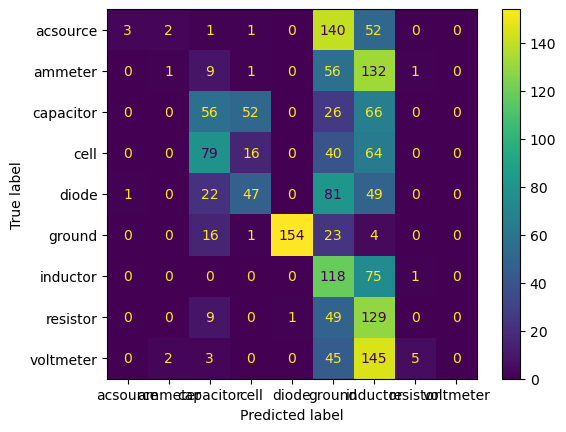

In [108]:
import os
import cv2
from skimage.feature import hog
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

# Step 1: Read the BMP images from the solvasubset folder
solvasubset_path = "solvasubset/"
test_images = []
true_labels = []

for filename in os.listdir(solvasubset_path):
    if filename.endswith(".bmp"):
        image_path = os.path.join(solvasubset_path, filename)
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            test_images.append(img)
            # Extract label from the first part of the file name
            true_label = filename.split('_')[0]
            true_labels.append(true_label)

# Step 2: Extract HOG features from the test images
hog_features_test = []

for img in test_images:
    img = cv2.resize(img, (64, 128))
    hog_feature = hog(img, orientations=9, pixels_per_cell=(8, 8),
                      cells_per_block=(2, 2), transform_sqrt=True,
                      block_norm="L1")
    hog_features_test.append(hog_feature)

# Step 3: Use the trained SVM classifier to predict labels for the test images
predicted_labels = svm_classifier.predict(hog_features_test)

# Step 4: Compare predicted labels with actual component labels
# Decode the predicted labels using the label_mapping dictionary
label_mapping = {label: idx for idx, label in enumerate(np.unique(predicted_labels))}
predicted_labels_decoded = [label_mapping[label] for label in predicted_labels]

# Form actual_labels by removing the index from the filenames
actual_labels = [filename.split('_')[0] for filename in os.listdir(solvasubset_path) if filename.endswith(".bmp")]

# Next, decode the true labels using the same LabelEncoder used during training
label_encoder = LabelEncoder()
true_labels_encoded = label_encoder.fit_transform(actual_labels)
predicted_labels_encoded = label_encoder.fit_transform(predicted_labels_decoded)

# Step 5: Construct the confusion matrix
conf_matrix = confusion_matrix(true_labels_encoded, predicted_labels_encoded)

# Step 6: Visualize the confusion matrix as a heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.title('Confusion Matrix')
# plt.show()

confsn_matrix = metrics.confusion_matrix(true_labels_encoded, predicted_labels_encoded)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confsn_matrix, display_labels = ["acsource", "ammeter", "capacitor", "cell", "diode", "ground", "inductor", "resistor", "voltmeter"]
)

# display matrix
plt.figure(figsize=(15, 10))
cm_display.plot()
plt.savefig('confusion_matrix_svm.png')
plt.show()
